In [17]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('/content/urldata.csv')

In [19]:
df.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0


correlation Heat Matrix

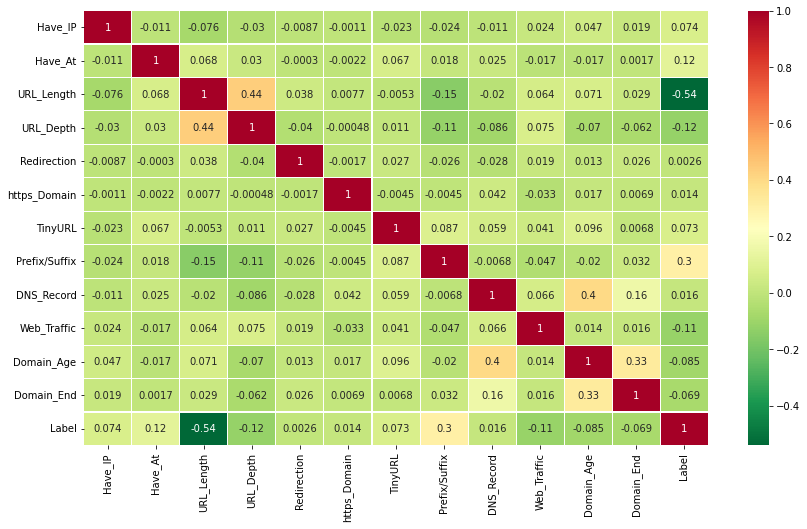

In [21]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), cmap ="RdYlGn_r", linewidths = 0.1, annot=True) 

some of the Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c15e819d0>,
      dtype=object)

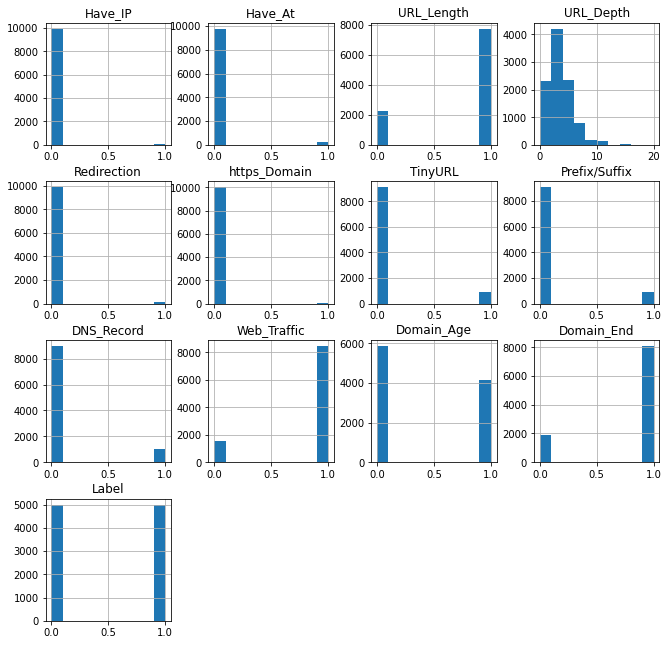

In [22]:
 df.hist(figsize=[11,11])

Train and Test Split

In [28]:
X = df.drop('Label', axis=1)
y = df['Label']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clf_lr = LogisticRegression(random_state = 555)
clf_lr.fit(X_train, y_train)
clf_lr.predict(X_test)
print('Accuracy: {:.2f}'.format(clf_lr.score(X_test, y_test)))

Accuracy: 0.79


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
clf_dtc = DecisionTreeClassifier(random_state=42)
clf_dtc.fit(X_train, y_train)
clf_dtc.predict(X_test)
print('Accuracy: {:.2f}'.format(clf_dtc.score(X_test, y_test)))

Accuracy: 0.85


Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
clf_rfc = RandomForestClassifier(n_estimators=100)
clf_rfc.fit(X_train, y_train)
clf_rfc.predict(X_test)
print('Accuracy: {:.2f}'.format(clf_rfc.score(X_test, y_test)))

Accuracy: 0.85


Support Vector Mission

In [38]:
from sklearn.svm import SVC

In [39]:
clf_svc = SVC(random_state=0, probability=True)
clf_svc.fit(X_train, y_train)
clf_svc.predict(X_test)
print('Accuracy: {:.2f}'.format(clf_svc.score(X_test, y_test)))

Accuracy: 0.81


5-fold Cross Validation

In [40]:
clfs = []
print('5-fold cross validation:\n')
for clf, label in zip([clf_lr, clf_dtc, clf_rfc, clf_svc],
                      ['Logistic Regression',
                       'Decision Tree',
                       'Random Forest',
                       'Support Vector Machine']):
    scores = sklearn.model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train, y_train)
    clfs.append(md)
    print("Test Accuracy: %0.4f " % (sklearn.metrics.accuracy_score(clf.predict(X_test), y_test)))

5-fold cross validation:



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Train CV Accuracy: 0.787 (+/- 0.012) [Logistic Regression]
Test Accuracy: 0.7920 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train CV Accuracy: 0.846 (+/- 0.011) [Decision Tree]
Test Accuracy: 0.8480 
Train CV Accuracy: 0.847 (+/- 0.010) [Random Forest]
Test Accuracy: 0.8476 
Train CV Accuracy: 0.805 (+/- 0.008) [Support Vector Machine]
Test Accuracy: 0.8144 


From this we can see that Decision Tree gives best accuracy.